<center><h1>Vedant Modi</h1></center>
<br>
<br>

Name: Vedant Modi
<br>
Tfekci,Pnar and Kaya,Heysem. (2014). Combined Cycle Power Plant. UCI Machine Learning Repository. https://doi.org/10.24432/C5002N.

## 1. Combined Cycle Power Plant Data Set

### (a) Download Data

Package imports

In [358]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Get the Cycle Power Plant Data Set

In [359]:
df = pd.read_excel("Folds5x2_pp.xlsx")
df

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90
...,...,...,...,...,...
9563,16.65,49.69,1014.01,91.00,460.03
9564,13.19,39.18,1023.67,66.78,469.62
9565,31.32,74.33,1012.92,36.48,429.57
9566,24.48,69.45,1013.86,62.39,435.74


### (b) Exploring the data

#### i. rows and columns

In [360]:
print("Number of rows:", df.shape[0])
print("Number of columns:", df.shape[1])

Number of rows: 9568
Number of columns: 5


The rows represent the data points in our dataframe, we see we have 9568 values for the predictors and the dependent variable. The columns represent the independent and dependent variable.

#### ii. pairwise scatterplots of all the varianbles

/Users/vedantmodi/anaconda3/envs/dsci552_hw0/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


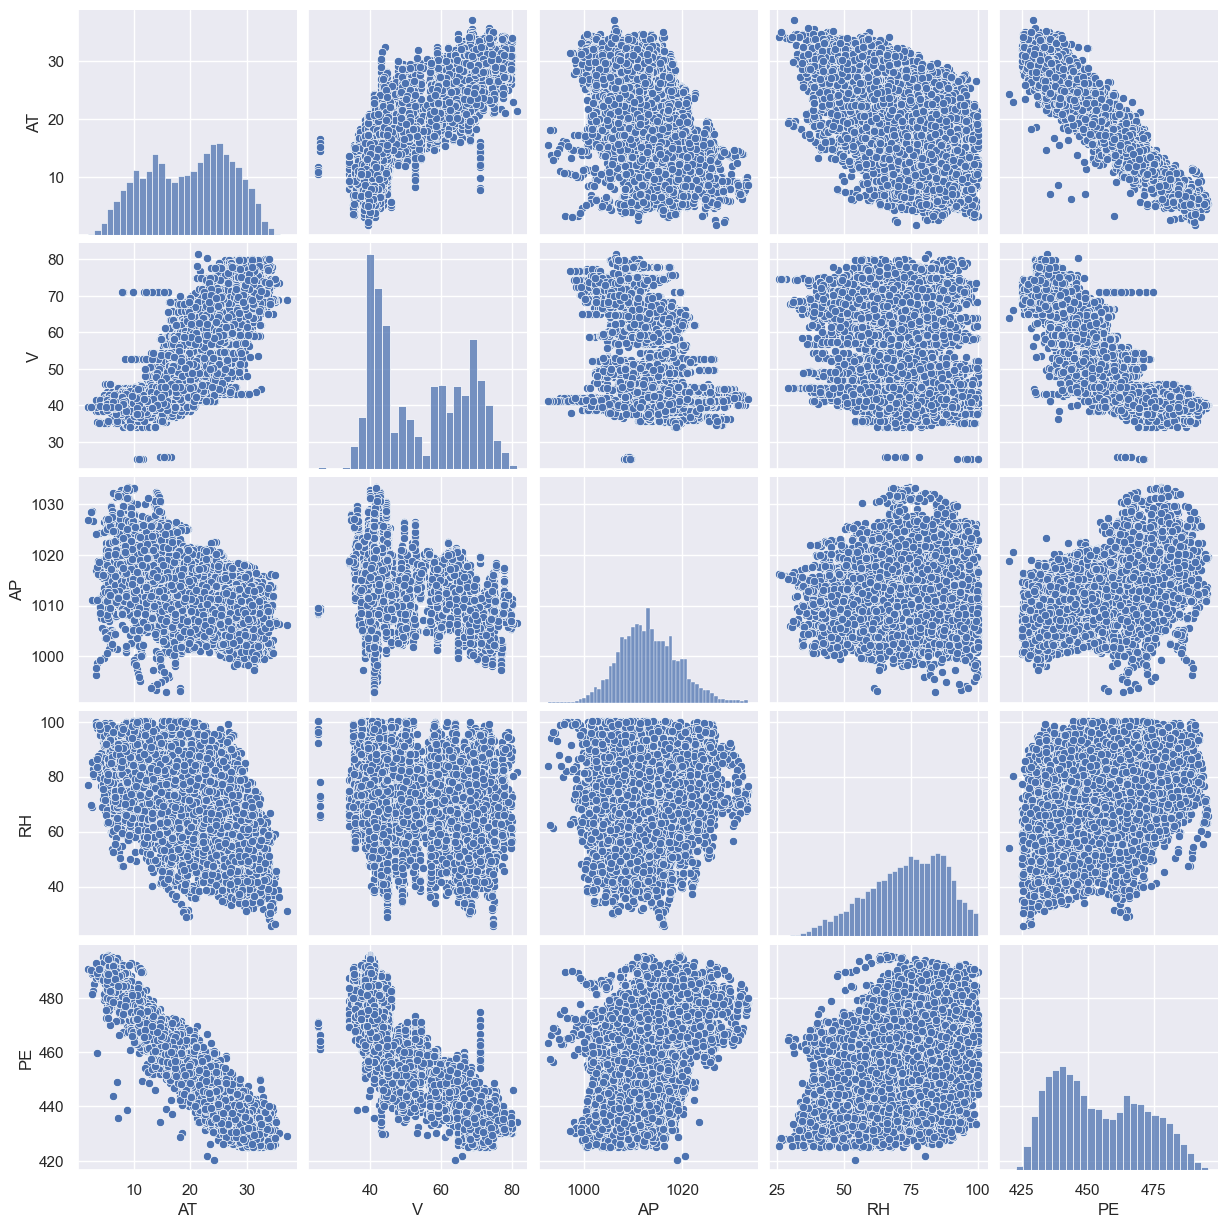

In [361]:
sns.set()
sns.pairplot(data=df, vars = ["AT", "V", "AP", "RH", "PE"])
plt.show()

<Axes: xlabel='PE', ylabel='AT'>

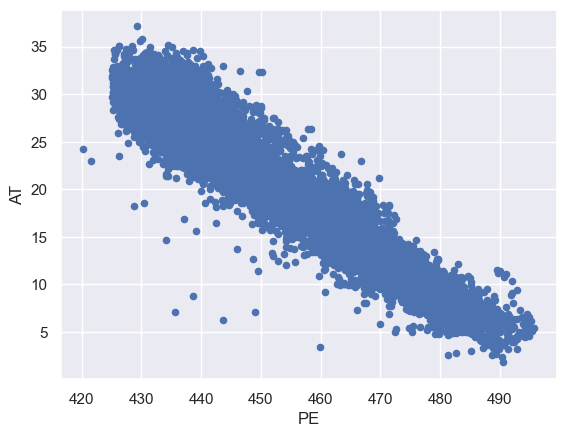

In [362]:

df.plot(kind='scatter', x='PE', y='AT')

<Axes: xlabel='PE', ylabel='V'>

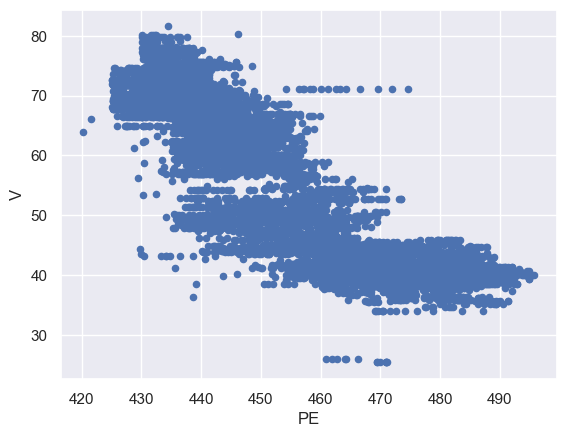

In [363]:
df.plot(kind='scatter', x='PE', y='V')

<Axes: xlabel='PE', ylabel='AP'>

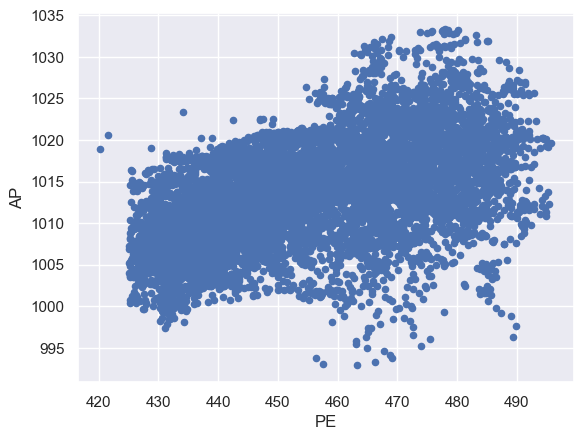

In [364]:
df.plot(kind='scatter', x='PE', y='AP')

<Axes: xlabel='PE', ylabel='RH'>

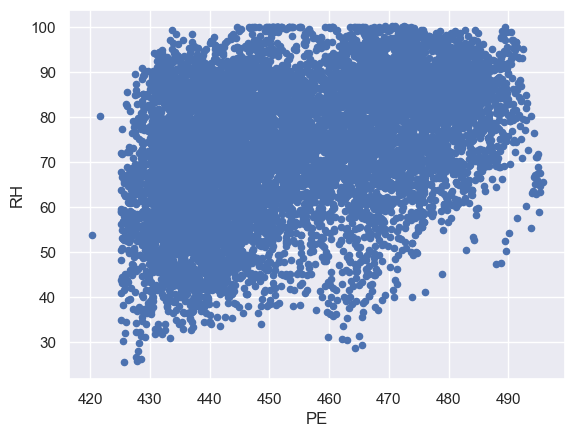

In [365]:
df.plot(kind='scatter', x='PE', y='RH')

In the above few graphs we've plotted the dependent varaibles against each other and against the independent variable. We see a strong negative correlation between PE and AT, and a weaker negative correlation between PE and V. PE and AP has a rather week positive correlation, and PE and RH seems to have a weeker one.

#### iii. mean, the median, range, first and third quartiles, and interquartile ranges

In [366]:
variable_stats = {
    'Variable': [],
    'Mean': [],
    'Median': [],
    'Range': [],
    'First Quartile': [],
    'Third Quartile': [],
    'Interquartile Range': []
}

for var in df.columns:
    variable_stats['Variable'].append(var)
    variable_stats['Mean'].append(df[var].mean())
    variable_stats['Median'].append(df[var].median())
    variable_stats['Range'].append(df[var].max() - df[var].min())
    variable_stats['First Quartile'].append(df[var].quantile(0.25))
    variable_stats['Third Quartile'].append(df[var].quantile(0.75))
    variable_stats['Interquartile Range'].append(df[var].quantile(0.75) - df[var].quantile(0.25))
    
stats_df = pd.DataFrame(variable_stats)

print(stats_df)

  Variable         Mean    Median  Range  First Quartile  Third Quartile  \
0       AT    19.651231    20.345  35.30         13.5100           25.72   
1        V    54.305804    52.080  56.20         41.7400           66.54   
2       AP  1013.259078  1012.940  40.41       1009.1000         1017.26   
3       RH    73.308978    74.975  74.60         63.3275           84.83   
4       PE   454.365009   451.550  75.50        439.7500          468.43   

   Interquartile Range  
0              12.2100  
1              24.8000  
2               8.1600  
3              21.5025  
4              28.6800  


### (c) Simple Linear Regression

In [373]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy.stats import zscore


In [368]:
predictors = ['AP', 'V', 'AT', 'RH']

for predictor in predictors:
    X = df[predictor]
    X = sm.add_constant(X)
    y = df['PE']

    model = sm.OLS(y, X).fit()
    print("Coeffecient: ", model.params[1])

Coeffecient:  1.4898716733991115
Coeffecient:  -1.1681351265557134
Coeffecient:  -2.171319958517799
Coeffecient:  0.45565010226298047


Summary for AP:
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.269
Model:                            OLS   Adj. R-squared:                  0.269
Method:                 Least Squares   F-statistic:                     3516.
Date:                Fri, 22 Sep 2023   Prob (F-statistic):               0.00
Time:                        15:22:56   Log-Likelihood:                -39224.
No. Observations:                9568   AIC:                         7.845e+04
Df Residuals:                    9566   BIC:                         7.847e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1055.2610     25.459    

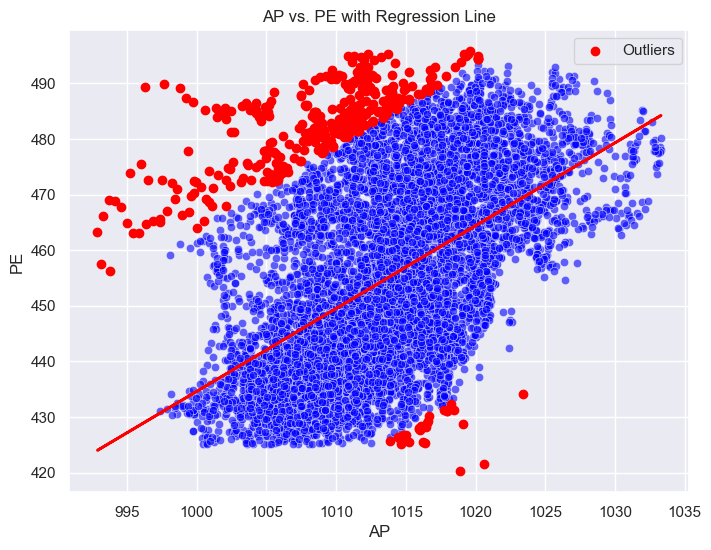

Summary for V:
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                 2.972e+04
Date:                Fri, 22 Sep 2023   Prob (F-statistic):               0.00
Time:                        15:22:57   Log-Likelihood:                -33963.
No. Observations:                9568   AIC:                         6.793e+04
Df Residuals:                    9566   BIC:                         6.794e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        517.8015      0.378   13

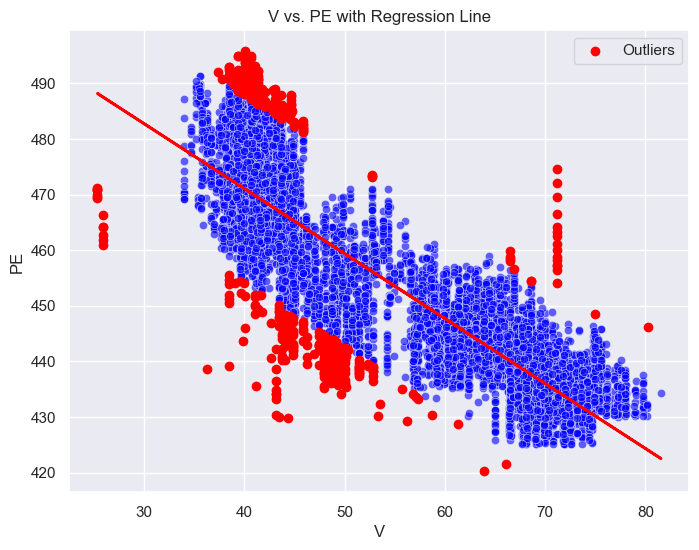

Summary for AT:
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                 8.510e+04
Date:                Fri, 22 Sep 2023   Prob (F-statistic):               0.00
Time:                        15:22:57   Log-Likelihood:                -29756.
No. Observations:                9568   AIC:                         5.952e+04
Df Residuals:                    9566   BIC:                         5.953e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        497.0341      0.156   3

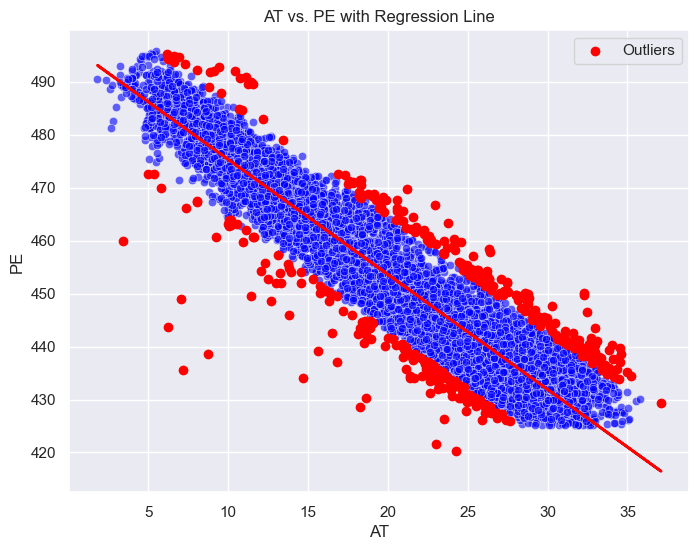

Summary for RH:
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.152
Model:                            OLS   Adj. R-squared:                  0.152
Method:                 Least Squares   F-statistic:                     1714.
Date:                Fri, 22 Sep 2023   Prob (F-statistic):               0.00
Time:                        15:22:57   Log-Likelihood:                -39933.
No. Observations:                9568   AIC:                         7.987e+04
Df Residuals:                    9566   BIC:                         7.988e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        420.9618      0.823    

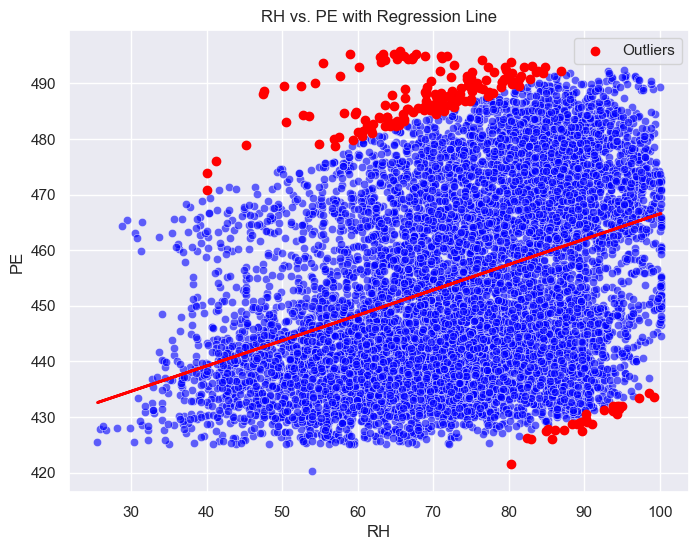

In [346]:
predictors = ['AP', 'V', 'AT', 'RH']

for predictor in predictors:
    X = df[predictor]
    X = sm.add_constant(X)
    y = df['PE']

    model = sm.OLS(y, X).fit()

    print(f'Summary for {predictor}:')
    print(model.summary())
    print("Coeffecient: ", model.params[1])

    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=X[predictor], y=y, color='blue', alpha=0.6)
    plt.plot(X[predictor], model.predict(X), color='red', linewidth=2)
    plt.xlabel(predictor)
    plt.ylabel('PE')
    plt.title(f'{predictor} vs. PE with Regression Line')

    residuals = model.resid
    threshold = 2 * residuals.std()
    outliers = df[(residuals > threshold) | (residuals < -threshold)]

    print(f'Outliers for {predictor}:')
    print(outliers)
    
    plt.scatter(outliers[predictor], outliers['PE'], color='red', label='Outliers')
    plt.legend()
    plt.show()

We have plotted graphs to find linear trends in the predictors with the dependent variable 'PE'. 

In the graphs, we see a strong negative correlation between PE and AT.
PE and VE too has a negative correlation but not as strong as that of PE and AT.
PE and AP, and PE and RH have positive correlations with the former being stronger than the latter.

### (d) Multiple Regression

In [338]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [348]:
x = df[['AT', 'V', 'AP', 'RH']]
y = df['PE']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=22)

x_train = sm.add_constant(x_train)

model = sm.OLS(y_train, x_train).fit()

x_test = sm.add_constant(x_test)
y_pred = model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)

print("Model Summary:")
print(model.summary())

print("Coefficients:")
print(model.params)
print("Mean Squared Error:", mse)

Model Summary:
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 2.333e+04
Date:                Fri, 22 Sep 2023   Prob (F-statistic):               0.00
Time:                        15:23:59   Log-Likelihood:                -21044.
No. Observations:                7176   AIC:                         4.210e+04
Df Residuals:                    7171   BIC:                         4.213e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        455.6371     11.218     

The null hypothesis can firmly be rejected for all four predictors, AT, V, AP, RH, since they yield a p-value of 0.000

### (e) 1c Compare to 1d

In [349]:
#uni_coeff = [-2.17131996, -1.16813513, 1.48987167, 0.4556501]
uni_coeff = [1.4898716733991115, -1.1681351265557134, -2.171319958517799, 0.45565010226298047]
multi_coeff = [-1.978329, -0.234031, -0.234031, -0.157022]

predictors = ['AT', 'V', 'AP', 'RH']

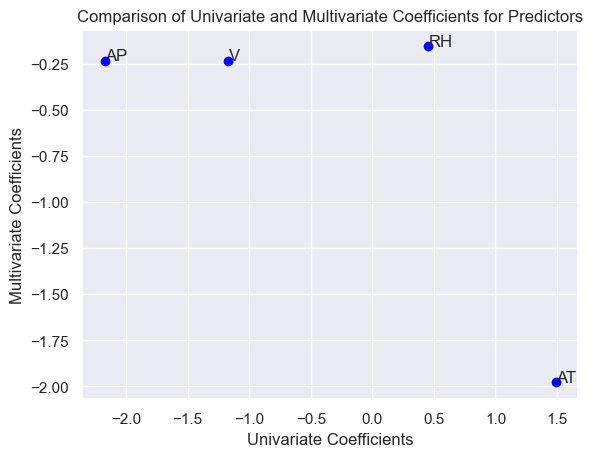

In [350]:
plt.scatter(uni_coeff, multi_coeff, color='blue')

plt.xlabel('Univariate Coefficients')
plt.ylabel('Multivariate Coefficients')
plt.title('Comparison of Univariate and Multivariate Coefficients for Predictors')

for i, predictor in enumerate(predictors):
    plt.annotate(predictor, (uni_coeff[i], multi_coeff[i]))

plt.show()

### (f) Nonlinear Association

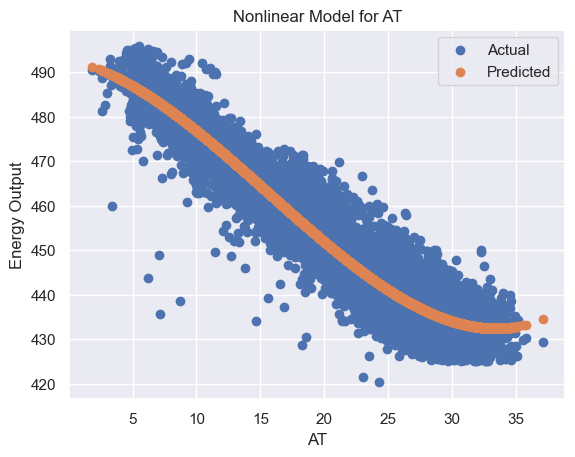

Summary for Nonlinear Model with AT:
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                 3.299e+04
Date:                Thu, 21 Sep 2023   Prob (F-statistic):               0.00
Time:                        18:47:11   Log-Likelihood:                -29101.
No. Observations:                9568   AIC:                         5.821e+04
Df Residuals:                    9564   BIC:                         5.824e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        49

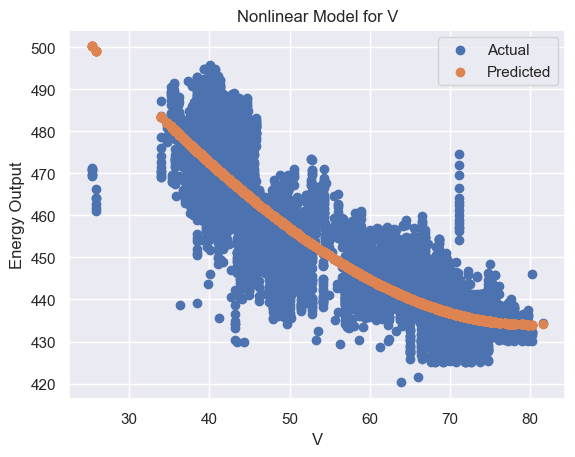

Summary for Nonlinear Model with V:
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                 1.098e+04
Date:                Thu, 21 Sep 2023   Prob (F-statistic):               0.00
Time:                        18:47:11   Log-Likelihood:                -33585.
No. Observations:                9568   AIC:                         6.718e+04
Df Residuals:                    9564   BIC:                         6.721e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        554

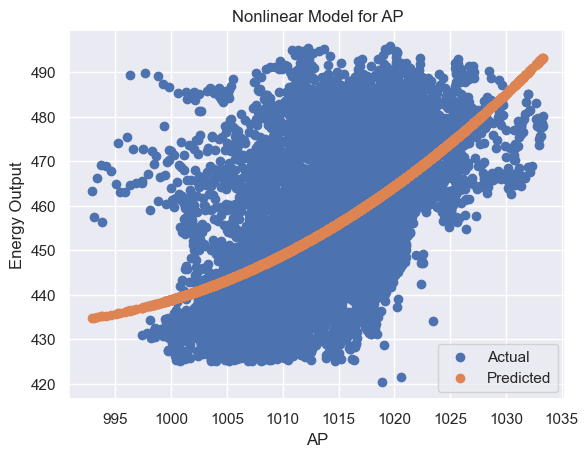

Summary for Nonlinear Model with AP:
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.275
Model:                            OLS   Adj. R-squared:                  0.275
Method:                 Least Squares   F-statistic:                     1813.
Date:                Thu, 21 Sep 2023   Prob (F-statistic):               0.00
Time:                        18:47:11   Log-Likelihood:                -39184.
No. Observations:                9568   AIC:                         7.837e+04
Df Residuals:                    9565   BIC:                         7.840e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          

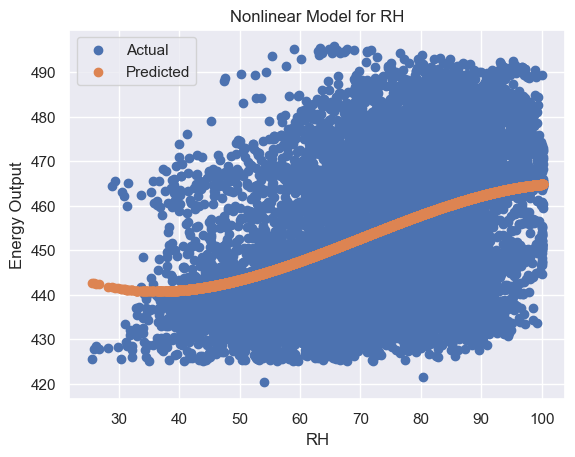

Summary for Nonlinear Model with RH:
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.154
Model:                            OLS   Adj. R-squared:                  0.153
Method:                 Least Squares   F-statistic:                     579.2
Date:                Thu, 21 Sep 2023   Prob (F-statistic):               0.00
Time:                        18:47:12   Log-Likelihood:                -39923.
No. Observations:                9568   AIC:                         7.985e+04
Df Residuals:                    9564   BIC:                         7.988e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        46

In [194]:
for predictor in predictors:
    x = df[predictor]
    y = df['PE']
    
    x_poly = np.column_stack((x, x**2, x**3))
    x_poly = sm.add_constant(x_poly)
    
    model = sm.OLS(y, x_poly).fit()

    plt.figure()
    plt.scatter(x, y, label='Actual')
    plt.scatter(x, model.predict(x_poly), label='Predicted')
    plt.xlabel(predictor)
    plt.ylabel('Energy Output')
    plt.title(f'Nonlinear Model for {predictor}')
    plt.legend()
    plt.show()

    print(f"Summary for Nonlinear Model with {predictor}:")
    print(model.summary())

We do see a nonlinear association between the four predictors and the response. This is displayed through the 0.00 p values and the graphs.

### (g) Interactions of Predictors

In [342]:
interaction_df = df

interaction_df['interaction_AT_V'] = interaction_df['AT'] * interaction_df['V']
interaction_df['interaction_AT_AP'] = interaction_df['AT'] * interaction_df['AP']
interaction_df['interaction_AT_RH'] = interaction_df['AT'] * interaction_df['RH']
interaction_df['interaction_V_AP'] = interaction_df['V'] * interaction_df['AP']
interaction_df['interaction_V_RH'] = interaction_df['V'] * interaction_df['RH']
interaction_df['interaction_AP_RH'] = interaction_df['AP'] * interaction_df['RH']

print(interaction_df)

         AT      V       AP     RH      PE  interaction_AT_V  \
0     14.96  41.76  1024.07  73.17  463.26          624.7296   
1     25.18  62.96  1020.04  59.08  444.37         1585.3328   
2      5.11  39.40  1012.16  92.14  488.56          201.3340   
3     20.86  57.32  1010.24  76.64  446.48         1195.6952   
4     10.82  37.50  1009.23  96.62  473.90          405.7500   
...     ...    ...      ...    ...     ...               ...   
9563  16.65  49.69  1014.01  91.00  460.03          827.3385   
9564  13.19  39.18  1023.67  66.78  469.62          516.7842   
9565  31.32  74.33  1012.92  36.48  429.57         2328.0156   
9566  24.48  69.45  1013.86  62.39  435.74         1700.1360   
9567  21.60  62.52  1017.23  67.87  453.28         1350.4320   

      interaction_AT_AP  interaction_AT_RH  interaction_V_AP  \
0            15320.0872          1094.6232        42765.1632   
1            25684.6072          1487.6344        64221.7184   
2             5172.1376           470.8

In [343]:
interaction_predictors = ['AT', 'V', 'AP', 'RH', 'interaction_AT_V', 'interaction_AT_AP',
       'interaction_AT_RH', 'interaction_V_AP', 'interaction_V_RH',
       'interaction_AP_RH']

In [344]:
interaction_predictors

['AT',
 'V',
 'AP',
 'RH',
 'interaction_AT_V',
 'interaction_AT_AP',
 'interaction_AT_RH',
 'interaction_V_AP',
 'interaction_V_RH',
 'interaction_AP_RH']

In [285]:
import statsmodels.formula.api as smf

In [291]:
y = interaction_df['PE']
X = interaction_df[interaction_predictors]

X = sm.add_constant(X)

#model = sm.OLS(y, X).fit()
model = smf.ols(formula='PE ~ AT + V + AP + RH + AT*V + AT*AP + AT*RH + V*AP + V*RH + AP*RH', data=df).fit()


print("Summary for Linear Regression with Interaction Terms:")
print(model.summary())

Summary for Linear Regression with Interaction Terms:
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                 1.405e+04
Date:                Fri, 22 Sep 2023   Prob (F-statistic):               0.00
Time:                        10:53:42   Log-Likelihood:                -27548.
No. Observations:                9568   AIC:                         5.512e+04
Df Residuals:                    9557   BIC:                         5.520e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------

In [292]:
x = interaction_df[interaction_predictors]
y = interaction_df['PE']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=22)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)

print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print("Mean Squared Error:", mse)
print(model.score(X_train, y_train))

Coefficients: [-4.10854426e+00 -7.63360549e+00 -1.32070554e-01  1.82884851e+00
  2.04803216e-02  1.51733602e-03 -4.75485874e-03  6.80829203e-03
  4.43649035e-04 -1.85425250e-03]
Intercept: 663.8960540933499
Mean Squared Error: 18.76320448000626
0.9361037116404076


We see an evidence of association of interactions for all predictors except AT, AT:AP, and V:RH. This is based on their p-values and the threshold being considered as 0.05.

### (h) Improvement

In [293]:
X = df[['AT', 'V', 'AP', 'RH']]
y = df['PE']

X = sm.add_constant(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=22)

model1 = sm.OLS(y_train, X_train).fit()

y_train_pred1 = model1.predict(X_train)
y_test_pred1 = model1.predict(X_test)

mse_train1 = mean_squared_error(y_train, y_train_pred1)
mse_test1 = mean_squared_error(y_test, y_test_pred1)

print("Model 1 - Linear Regression with All Predictors")
print("Training MSE:", mse_train1)
print("Testing MSE:", mse_test1)

Model 1 - Linear Regression with All Predictors
Training MSE: 20.470335369786042
Testing MSE: 21.463225312620906


In [294]:
interaction_df["AT^2"] = interaction_df["AT"]**2
interaction_df["V^2"] = interaction_df["V"]**2
interaction_df["AP^2"] = interaction_df["AP"]**2
interaction_df["RH^2"] = interaction_df["RH"]**2

In [296]:
interaction_df.columns

Index(['AT', 'V', 'AP', 'RH', 'PE', 'interaction_AT_V', 'interaction_AT_AP',
       'interaction_AT_RH', 'interaction_V_AP', 'interaction_V_RH',
       'interaction_AP_RH', 'AT^2', 'V^2', 'AP^2', 'RH^2'],
      dtype='object')

In [305]:
interaction_predictors = ['AT', 'V', 'AP', 'RH', 'interaction_AT_V', 'interaction_AT_AP',
       'interaction_AT_RH', 'interaction_V_AP', 'interaction_V_RH',
       'interaction_AP_RH', 'AT^2', 'V^2', 'AP^2', 'RH^2']

In [306]:
interaction_predictors

['AT',
 'V',
 'AP',
 'RH',
 'interaction_AT_V',
 'interaction_AT_AP',
 'interaction_AT_RH',
 'interaction_V_AP',
 'interaction_V_RH',
 'interaction_AP_RH',
 'AT^2',
 'V^2',
 'AP^2',
 'RH^2']

In [307]:
interaction_df

,AT,V,AP,RH,PE,interaction_AT_V,interaction_AT_AP,interaction_AT_RH,interaction_V_AP,interaction_V_RH,interaction_AP_RH,AT^2,V^2,AP^2,RH^2
0,14.96,41.76,1024.07,73.17,463.26,624.7296,15320.0872,1094.6232,42765.1632,3055.5792,74931.2019,223.8016,1743.8976,1.048719e+06,5353.8489
1,25.18,62.96,1020.04,59.08,444.37,1585.3328,25684.6072,1487.6344,64221.7184,3719.6768,60263.9632,634.0324,3963.9616,1.040482e+06,3490.4464
2,5.11,39.40,1012.16,92.14,488.56,201.3340,5172.1376,470.8354,39879.1040,3630.3160,93260.4224,26.1121,1552.3600,1.024468e+06,8489.7796
3,20.86,57.32,1010.24,76.64,446.48,1195.6952,21073.6064,1598.7104,57906.9568,4393.0048,77424.7936,435.1396,3285.5824,1.020585e+06,5873.6896
4,10.82,37.50,1009.23,96.62,473.90,405.7500,10919.8686,1045.4284,37846.1250,3623.2500,97511.8026,117.0724,1406.2500,1.018545e+06,9335.4244
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9563,16.65,49.69,1014.01,91.00,460.03,827.3385,16883.2665,1515.1500,50386.1569,4521.7900,92274.9100,277.2225,2469.0961,1.028216e+06,8281.0000
9564,13.19,39.18,1023.67,66.78,469.62,516.7842,13502.2073,880.8282,40107.3906,2616.4404,68360.6826,173.9761,1535.0724,1.047900e+06,4459.5684
9565,31.32,74.33,1012.92,36.48,429.57,2328.0156,31724.6544,1142.5536,75290.3436,2711.5584,36951.3216,980.9424,5524.9489,1.026007e+06,1330.7904
9566,24.48,69.45,1013.86,62.39,435.74,1700.1360,24819.2928,1527.3072,70412.5770,4332.9855,63254.7254,599.2704,4823.3025,1.027912e+06,3892.5121


In [308]:
y2 = df['PE']
X2 = interaction_df[interaction_predictors]
X2 = sm.add_constant(X2)

In [309]:
X2

,const,AT,V,AP,RH,interaction_AT_V,interaction_AT_AP,interaction_AT_RH,interaction_V_AP,interaction_V_RH,interaction_AP_RH,AT^2,V^2,AP^2,RH^2
0,1.0,14.96,41.76,1024.07,73.17,624.7296,15320.0872,1094.6232,42765.1632,3055.5792,74931.2019,223.8016,1743.8976,1.048719e+06,5353.8489
1,1.0,25.18,62.96,1020.04,59.08,1585.3328,25684.6072,1487.6344,64221.7184,3719.6768,60263.9632,634.0324,3963.9616,1.040482e+06,3490.4464
2,1.0,5.11,39.40,1012.16,92.14,201.3340,5172.1376,470.8354,39879.1040,3630.3160,93260.4224,26.1121,1552.3600,1.024468e+06,8489.7796
3,1.0,20.86,57.32,1010.24,76.64,1195.6952,21073.6064,1598.7104,57906.9568,4393.0048,77424.7936,435.1396,3285.5824,1.020585e+06,5873.6896
4,1.0,10.82,37.50,1009.23,96.62,405.7500,10919.8686,1045.4284,37846.1250,3623.2500,97511.8026,117.0724,1406.2500,1.018545e+06,9335.4244
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9563,1.0,16.65,49.69,1014.01,91.00,827.3385,16883.2665,1515.1500,50386.1569,4521.7900,92274.9100,277.2225,2469.0961,1.028216e+06,8281.0000
9564,1.0,13.19,39.18,1023.67,66.78,516.7842,13502.2073,880.8282,40107.3906,2616.4404,68360.6826,173.9761,1535.0724,1.047900e+06,4459.5684
9565,1.0,31.32,74.33,1012.92,36.48,2328.0156,31724.6544,1142.5536,75290.3436,2711.5584,36951.3216,980.9424,5524.9489,1.026007e+06,1330.7904
9566,1.0,24.48,69.45,1013.86,62.39,1700.1360,24819.2928,1527.3072,70412.5770,4332.9855,63254.7254,599.2704,4823.3025,1.027912e+06,3892.5121


In [310]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=22)

model1 = sm.OLS(y_train, X_train).fit()

y_train_pred1 = model1.predict(X_train)
y_test_pred1 = model1.predict(X_test)

mse_train1 = mean_squared_error(y_train, y_train_pred1)
mse_test1 = mean_squared_error(y_test, y_test_pred1)

print("Model 1 - Linear Regression with All Predictors")
print("Training MSE:", mse_train1)
print("Testing MSE:", mse_test1)

Model 1 - Linear Regression with All Predictors
Training MSE: 20.470335369786042
Testing MSE: 21.463225312620906


In [311]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.3, random_state=42)

model2 = sm.OLS(y_train2, X_train2).fit()

print("Summary for Linear Regression with Interaction Terms:")
print(model2.summary())

significant_predictors = model2.pvalues[model2.pvalues < 0.05].index
model2_refit = sm.OLS(y_train2, X_train2[significant_predictors]).fit()
print("\nSummary for Linear Regression with Significant Predictors:")
print(model2_refit.summary())

y_train_pred2_refit = model2_refit.predict(X_train2[significant_predictors])
y_test_pred2_refit = model2_refit.predict(X_test2[significant_predictors])

mse_train2_refit = mean_squared_error(y_train2, y_train_pred2_refit)
mse_test2_refit = mean_squared_error(y_test2, y_test_pred2_refit)

print("\nModel with Significant Predictors - Mean Squared Errors:")
print("Training MSE:", mse_train2_refit)
print("Testing MSE:", mse_test2_refit)

Summary for Linear Regression with Interaction Terms:
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     7272.
Date:                Fri, 22 Sep 2023   Prob (F-statistic):               0.00
Time:                        10:56:57   Log-Likelihood:                -19160.
No. Observations:                6697   AIC:                         3.835e+04
Df Residuals:                    6682   BIC:                         3.845e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------

### (i) KNN

In [167]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor

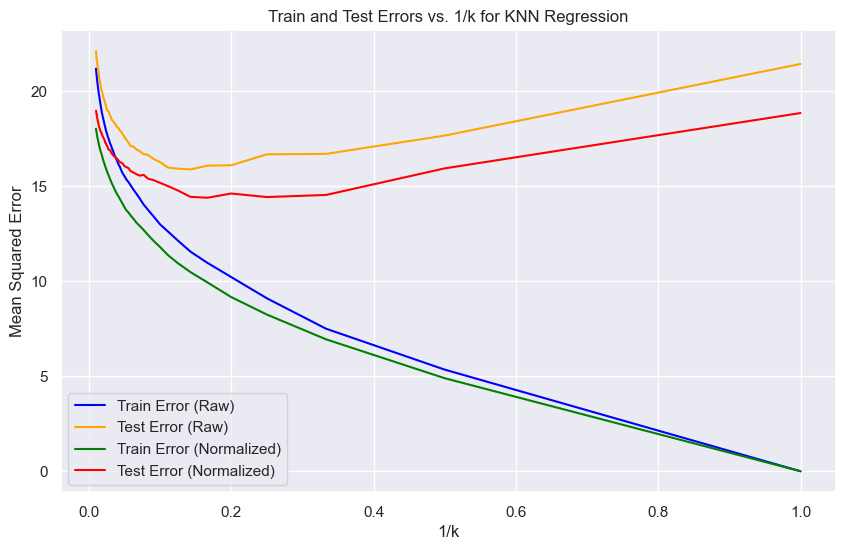

In [317]:
from sklearn.preprocessing import MinMaxScaler
X = df[['AP', 'V', 'AT', 'RH']].values
y = df['PE'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22)

scaler = MinMaxScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

train_errors = []
test_errors = []

k_values = range(1, 101)

for k in k_values:
    knn_raw = KNeighborsRegressor(n_neighbors=k)
    knn_raw.fit(X_train, y_train)
    y_train_pred_raw = knn_raw.predict(X_train)
    y_test_pred_raw = knn_raw.predict(X_test)
    train_errors.append(mean_squared_error(y_train, y_train_pred_raw))
    test_errors.append(mean_squared_error(y_test, y_test_pred_raw))

plt.figure(figsize=(10, 6))

plt.plot(1/np.array(k_values), train_errors, label='Train Error (Raw)', color='blue')
plt.plot(1/np.array(k_values), test_errors, label='Test Error (Raw)', color='orange')



train_errors_normalized = []
test_errors_normalized = []

for k in k_values:
    knn_normalized = KNeighborsRegressor(n_neighbors=k)
    knn_normalized.fit(X_train_normalized, y_train)
    y_train_pred_normalized = knn_normalized.predict(X_train_normalized)
    y_test_pred_normalized = knn_normalized.predict(X_test_normalized)
    train_errors_normalized.append(mean_squared_error(y_train, y_train_pred_normalized))
    test_errors_normalized.append(mean_squared_error(y_test, y_test_pred_normalized))

plt.plot(1/np.array(k_values), train_errors_normalized, label='Train Error (Normalized)', color='green')
plt.plot(1/np.array(k_values), test_errors_normalized, label='Test Error (Normalized)', color='red')

plt.xlabel('1/k')
plt.ylabel('Mean Squared Error')
plt.title('Train and Test Errors vs. 1/k for KNN Regression')
plt.legend()
plt.grid(True)
plt.show()

In [318]:
print("Smallest test error of the Normalized Data with KNN: ", test_errors_normalized[-1])
print("Smallest test error of only the Significant Predictors with Regression: ", mse_test2_refit)

Smallest test error of the Normalized Data with KNN:  18.989147753307204
Smallest test error of only the Significant Predictors with Regression:  19.221018954940284


### (j ) Compare KNN and Linear

We see that the test error of the better results of the two, KNN and Regression, i.e, with normalized data and with only significant predictors respectively is very similar. The regression performs marginally better. However, KNN performs much better when it comes to train error rates.

## 2. ISLR: 2.4.1

### (a) The sample size n is extremely large, and the number of predictors p is small.

In this case a flexible statistical learning method might perform better. It has a reduced risk of overfititng the large sample size since they can be better regularized and tuned to reduce overfitting. This results in a higher accuracy.

### (b) The number of predictors p is extremely large, and the number of observations n is small.

Here, using a flexible statistical learning method can lead to overfitting and poor generalization performance and perform worse. Since the sample size is low, the complex model might learn the noise in the data rather than the trends in it.

### (c) The relationship between the predictors and response is highly non-linear.

The flexible statistical learning method is better. The complexity of the model better captures the non-linear relationships between predictors and response variables. The are not limited to linear and simple trends.

### (d) The variance of the error terms, i.e. $σ^2$ = Var(ε), is extremely high.

The flexible statistical learning method might be worse. Since the variance of the error terms is high, flexible methods will tend to fit to the noise

## 3. ISLR: 2.4.7

### (a) Compute the Euclidean distance between each observation and the test point, X1 = X2 = X3 = 0.

To do this we use the euclidiean distance formula
$distance = \sqrt{(X~test~ - X~observation~)^2 + (Y~test~ - Y~observation~)^2 + (Z~test~ - Z~observation~)^2}$

| Observation | Distance to (0, 0, 0) |
| --- | --- |
| 1 | 3 |
| 2 | 2 |
| 3 | 3.16 |
| 4 | 2.24 |
| 5 | 1.41 |
| 6 | 1.73 |

### (b) What is our prediction with K = 1? Why?

With K=1 we choose the nearest neighbor to the point (0, 0, 0) based on the distance we found above and predict the class associated with that nearest neighbor.

Observation 5 with a distance of 1.41 is closest to 1. This corresponds to the class "Green".

### (c) What is our prediction with K = 3? Why?

When K=3, we find the three nearest neighbours to the test point (0, 0, 0).

Based on our calculations, those points are observations 5, 6, and 2 with distances 1.41, 1.73, and 2 respectively.

Two of these values correspond to red, and one to green. The majority class is red.

### (d) If the Bayes decision boundary in this problem is highly non-linear, then would we expect the best value for K to be large or small? Why?

In this case I would expect the K value to be small. This is because of a few reasons.

Firstly, due to the small value of K the model is more flexible and easily adapts to the data structures to capture non linear relationships.
Moreover, a small K value can capture localized non linear boundaries more effectively whereas a large K would try to fit more points.